In [1]:
import alpaca_trade_api as tradeapi
import backtrader as bt
import quantstats as qs
import pandas as pd
import os

In [2]:
# Set up Alpaca API
API_KEY = os.getenv('API_KEY')
SECRET_KEY = os.getenv('SECRET_KEY')
BASE_URL = 'https://paper-api.alpaca.markets'

api = tradeapi.REST(API_KEY, SECRET_KEY, base_url=BASE_URL, api_version='v2')

# Set the data source and timeframe
SYMBOL = 'AAPL'
INTERVAL = '1D'
start_date = pd.Timestamp('2022-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-01', tz='America/New_York').isoformat()

# Get the data from Alpaca
barset = api.get_bars(symbol=SYMBOL, timeframe=INTERVAL, start=start_date, end=end_date).df

# Convert the data to a Backtrader-compatible format
data = bt.feeds.PandasData(dataname=barset)

In [3]:
class RsiStrategy(bt.Strategy):
    params = (
        ('rsi_lower', 30),
        ('rsi_upper', 70),
    )

    def __init__(self):
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=14)
        self.buy_order = None

    def next(self):
        if not self.position:
            if self.rsi < self.params.rsi_lower:
                self.buy_order = api.submit_order(
                    symbol=SYMBOL,
                    qty=1,
                    side='buy',
                    type='market',
                    time_in_force='gtc'
                )
                self.buy()

        if self.position:
            if self.rsi > self.params.rsi_upper:
                if self.buy_order is not None:
                    order_status = api.get_order(self.buy_order.id).status
                    if order_status == 'filled':
                        api.submit_order(
                            symbol=SYMBOL,
                            qty=1,
                            side='sell',
                            type='market',
                            time_in_force='gtc'
                        )
                        self.sell()
                elif self.position.size < 0:
                    self.close()

In [4]:
# Create a Cerebro instance and add the data and strategy
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(RsiStrategy)

# Run the backtest
initial_cash = 100000
cerebro.broker.setcash(initial_cash)
results = cerebro.run()

In [5]:
# Calculate the return and profit
final_cash = cerebro.broker.getvalue()
total_return = (final_cash - initial_cash) / initial_cash * 100
profit = final_cash - initial_cash

print(f'Total return: {total_return:.2f}%')
print(f'Profit: ${profit:.2f}')

Total return: -0.03%
Profit: $-29.05


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


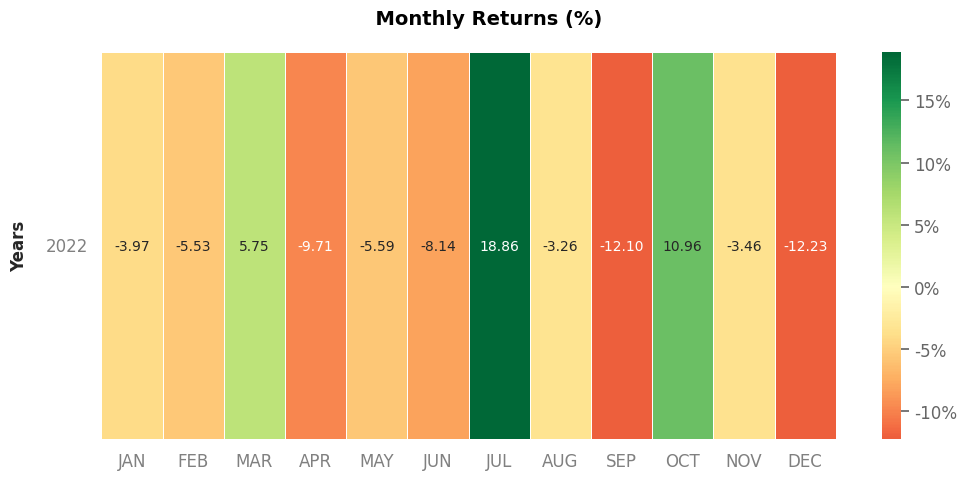

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


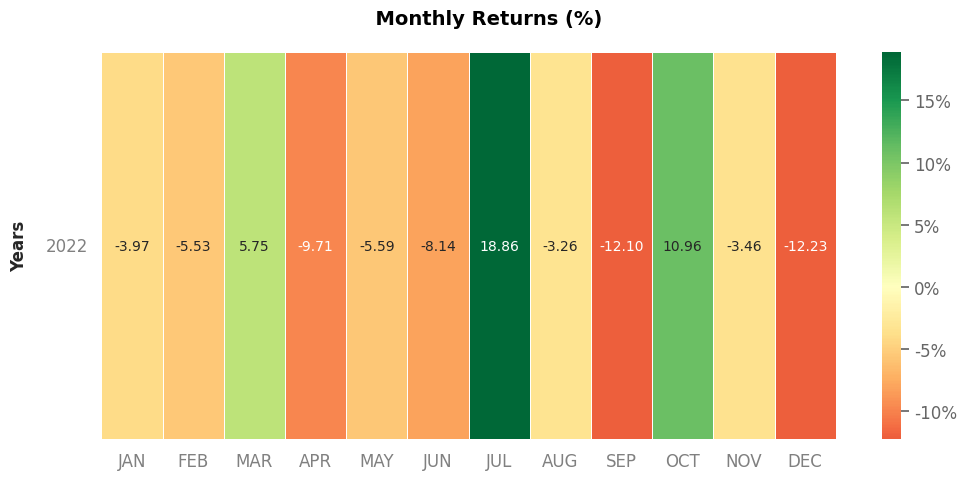

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


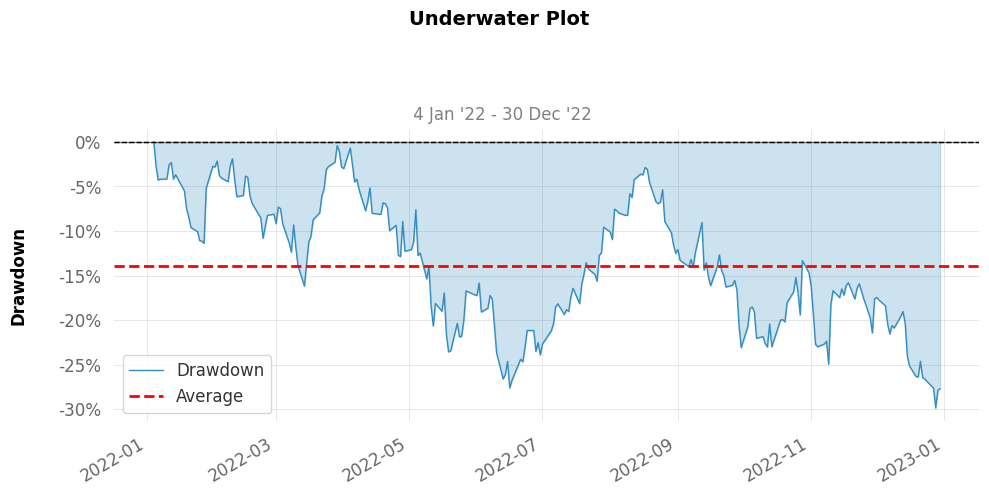

                           Strategy
-------------------------  ----------
Start Period               2022-01-04
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -28.61%
CAGR﹪                     -28.95%

Sharpe                     -0.77
Prob. Sharpe Ratio         22.24%
Smart Sharpe               -0.76
Sortino                    -1.09
Smart Sortino              -1.06
Sortino/√2                 -0.77
Smart Sortino/√2           -0.75
Omega                      0.88

Max Drawdown               -29.86%
Longest DD Days            359
Volatility (ann.)          35.66%
Calmar                     -0.97
Skew                       0.33
Kurtosis                   1.08

Expected Daily %           -0.13%
Expected Monthly %         -2.77%
Expected Yearly %          -28.61%
Kelly Criterion            -6.35%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.81%
Expected Shortfall (cVaR)  -3.81%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-05,2022-12-28,2022-12-30,359,-29.860879,-27.640512


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


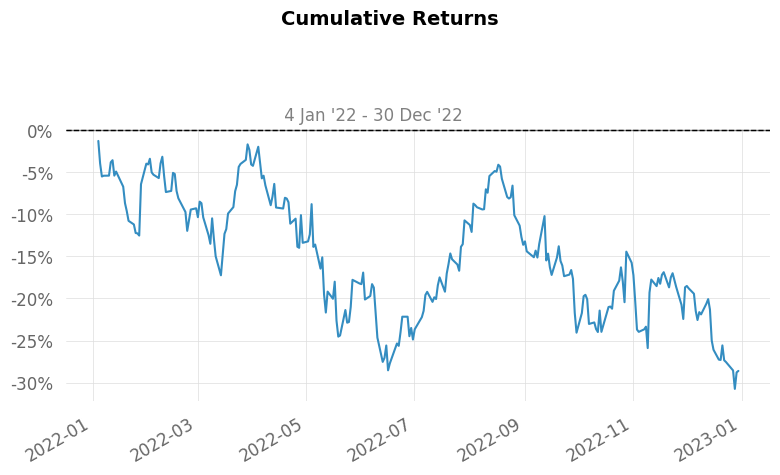

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


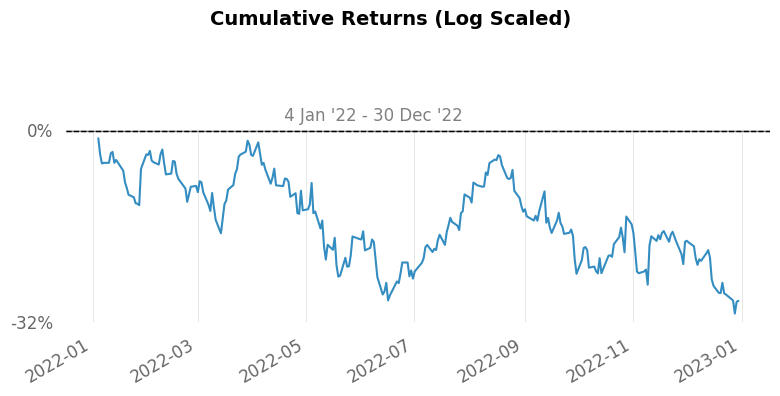

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


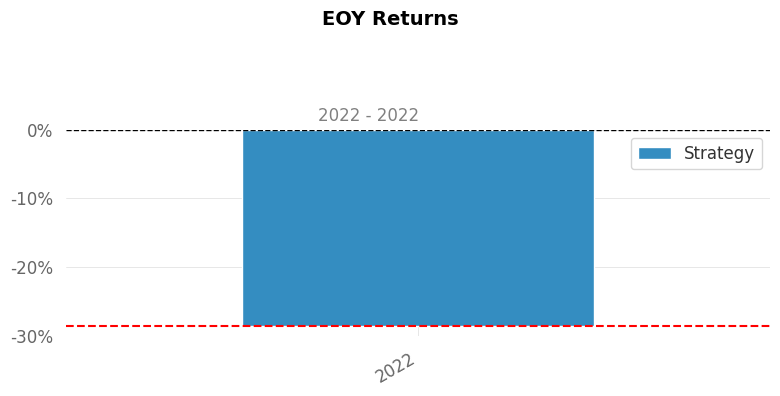

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


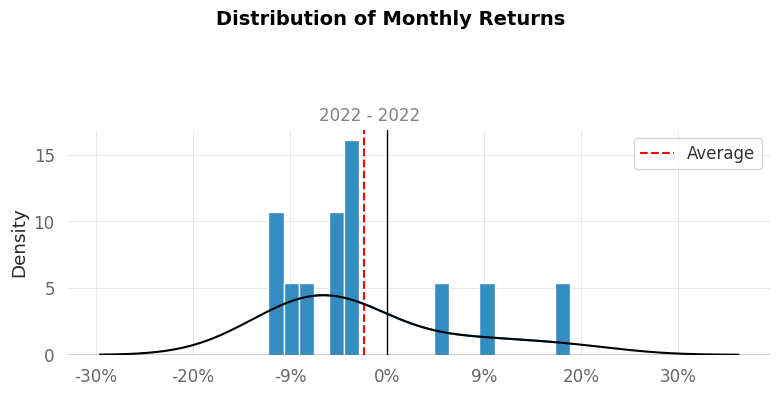

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


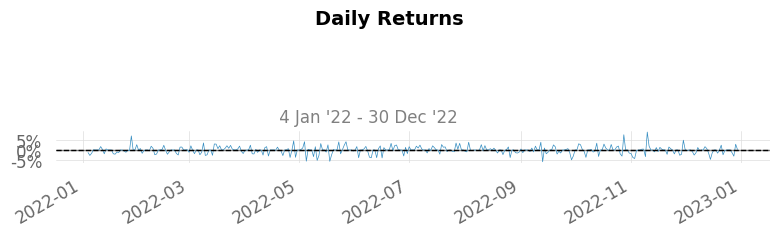

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


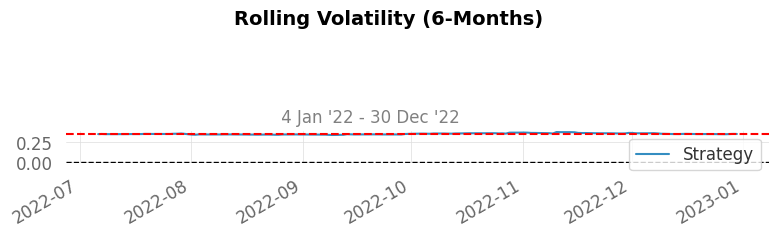

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


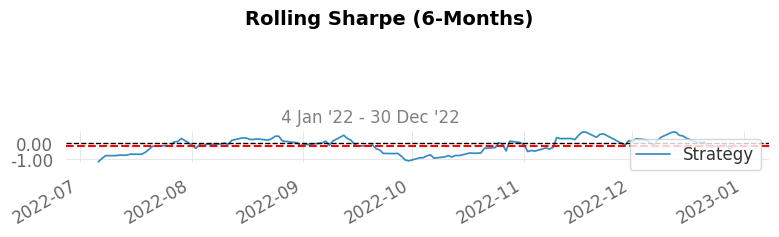

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


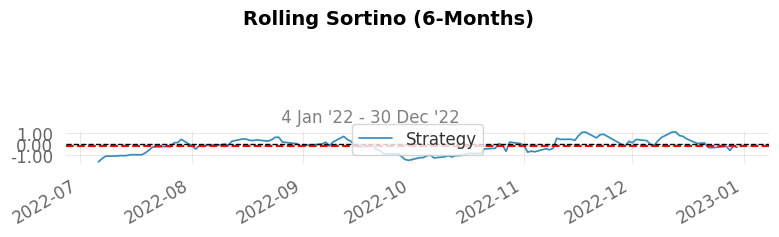

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


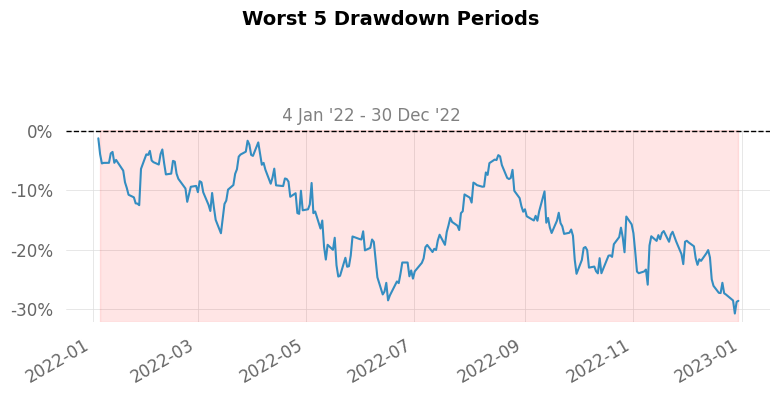

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


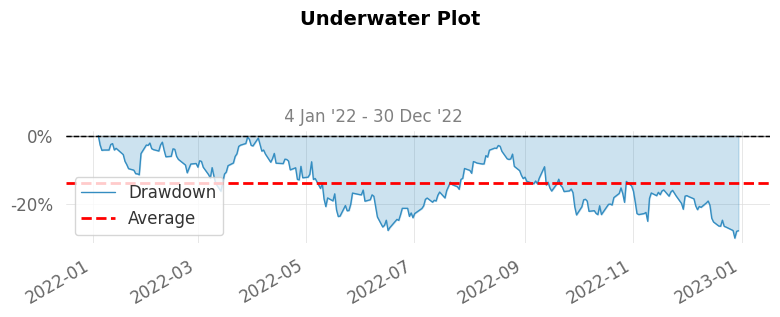

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


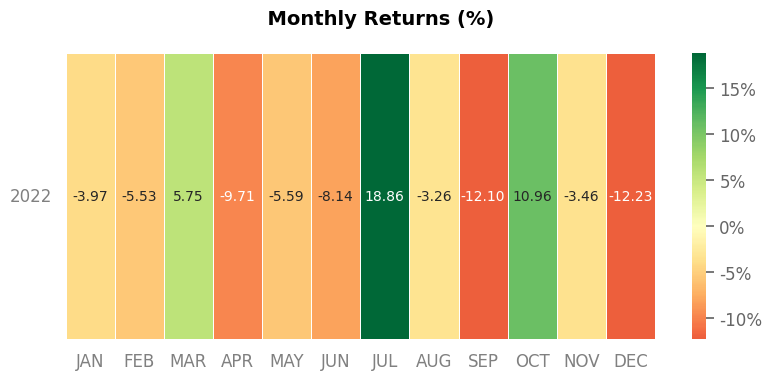

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


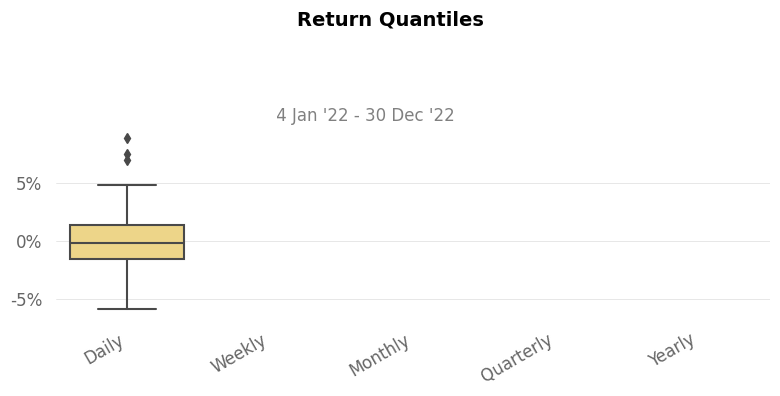

In [6]:
# Prepare the data for QuantStats
returns = pd.Series(data=barset['close'].pct_change().dropna().values, index=pd.to_datetime(barset.index[1:]).to_numpy(dtype='datetime64[ns]'))

qs.plots.monthly_heatmap(returns)
qs.plots.monthly_returns(returns)
qs.plots.drawdown(returns)

# Generate the report
qs.reports.full(returns)